<a href="https://colab.research.google.com/github/jingexu/cells-in-gel/blob/master/example_nuclei.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tips: This example notebook `example_nuclei` is debugged in Google Colab due to the privacy of original images(everyone with a UW email address can view the original images). If you run this notebook on your local machine, there might be some tiny adjustment. Code of importing customized modules is more straightforward but you need to pre-download the original images. Feel free to create a new issue in our github if you have any questions. Our github address is `https://github.com/jingexu/cells-in-gel`

At the very beginning, we import fundamental analysis packages `pandas`,`numpy`,`matplotlib.pyplot`, and `sys`.

Add the path of our customized modules for image processing from Google Drive, then we are able to import our own modules to this notebook.

In [0]:
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt

In [0]:
sys.path.append('/content/drive/My Drive/Colab Notebooks/cells_in_gel')

In [0]:
import preprocess as pre
import properties as pro
from skimage.color import rgb2gray

First, we extract all the images of nucleus(started with 'C2' in the folder) into a list by calling the function `list_of_images` in `preprocess` module.

In [0]:
tifflist = pre.list_of_images('C2')

In [5]:
(tifflist)

['/content/drive/My Drive/Fibroblasts in PEG Gels with NTG I61Q exm/20x TIFFs/Channel Separated/C2-NTG-CFbs_NoECM_0mMRGD_20x_001.tif',
 '/content/drive/My Drive/Fibroblasts in PEG Gels with NTG I61Q exm/20x TIFFs/Channel Separated/C2-NTG-CFbs_NoECM_0mMRGD_20x_002.tif',
 '/content/drive/My Drive/Fibroblasts in PEG Gels with NTG I61Q exm/20x TIFFs/Channel Separated/C2-NTG-CFbs_NoECM_0mMRGD_20x_003.tif',
 '/content/drive/My Drive/Fibroblasts in PEG Gels with NTG I61Q exm/20x TIFFs/Channel Separated/C2-I61QTTA-CFbs_NoECM_0mMRGD_20x_001.tif',
 '/content/drive/My Drive/Fibroblasts in PEG Gels with NTG I61Q exm/20x TIFFs/Channel Separated/C2-I61QTTA-CFbs_NoECM_0mMRGD_20x_002.tif',
 '/content/drive/My Drive/Fibroblasts in PEG Gels with NTG I61Q exm/20x TIFFs/Channel Separated/C2-I61QTTA-CFbs_NoECM_0mMRGD_20x_003.tif',
 '/content/drive/My Drive/Fibroblasts in PEG Gels with NTG I61Q exm/20x TIFFs/Channel Separated/C2-NTG-CFbs_NoECM_1mMRGD_20x_001.tif',
 '/content/drive/My Drive/Fibroblasts in PE

We can have a look at one sample image.

(-0.5, 1023.5, 1023.5, -0.5)

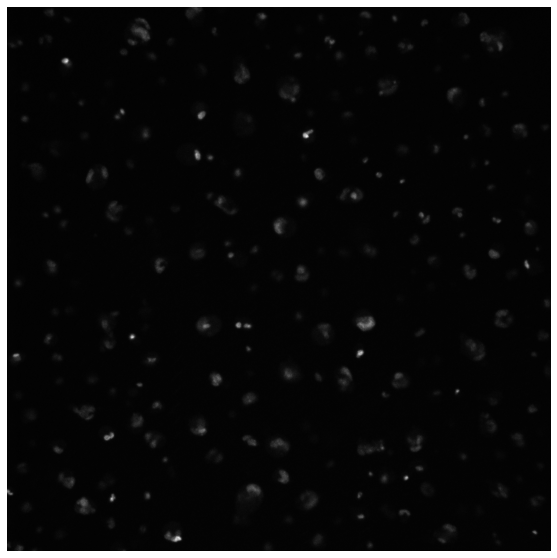

In [11]:
im = plt.imread(tifflist[0])
fig,ax = plt.subplots(figsize=(10,10))
ax.imshow(im,cmap='gray')
ax.axis('off')

Such a vague image that it's hard to observe, not to mention an analysis. Thus the urgent work is to enhance the nucleus in the image.

Our group customized two function for such an enhancement, `sharpen_nuclei` and `enhance_nucleis`. Each funtion contains two enhancement method and now we call this two function for visualizaiton.

In [0]:
im = plt.imread(tifflist[0])

(1024, 1024)
0.11922240086830373


/usr/local/lib/python3.6/dist-packages/skimage/filters/rank/generic.py:119: UserWarning: Possible precision loss converting image of type bool to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  out_dtype)


0.10458118709560899
0.02972059285278439


[array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]), array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])]

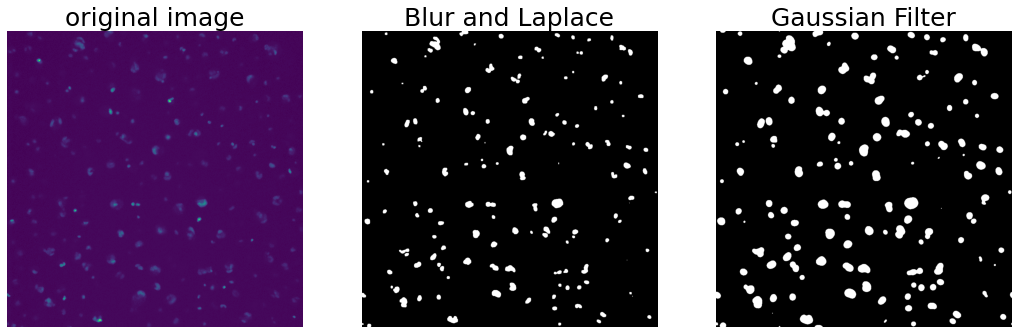

In [17]:
pre.sharpen_nuclei(im)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

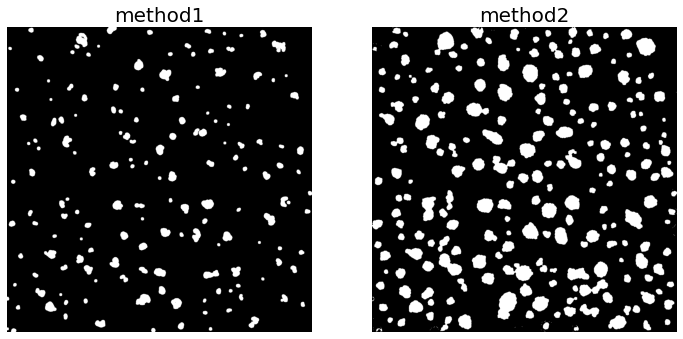

In [18]:
pre.enhance_nucleis(im)

A brief comparison: the function `sharpen_nuclei` is doing a good job, but both of its outputs indicate nuclei loss to some extent. As a contrast, the function `enhance_nucleis` reduce the nuclei loss. And nucleus from method1 have a morphology closer to the original image. As a result, we choose the output of method1 in `enhance_nucleis` for later processing.

Then, we directly call the function `counting_nucleis` in the `properties` module and treat our imagelist of nucleus. This function will first sharpen the nucleus in object images and then count how many nucleus are there in the object image. 

In [6]:
pro.counting_nucleis(tifflist)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59


,cell_type,ecm_cond,rgd_cond,counts
0,C2-NTG-CFbs,NoECM,0mMRGD,158
1,C2-NTG-CFbs,NoECM,0mMRGD,223
2,C2-NTG-CFbs,NoECM,0mMRGD,215
3,C2-I61QTTA-CFbs,NoECM,0mMRGD,164
4,C2-I61QTTA-CFbs,NoECM,0mMRGD,73
5,C2-I61QTTA-CFbs,NoECM,0mMRGD,88
6,C2-NTG-CFbs,NoECM,1mMRGD,182
7,C2-NTG-CFbs,NoECM,1mMRGD,257
8,C2-NTG-CFbs,NoECM,1mMRGD,327
9,C2-I61QTTA-CFbs,NoECM,1mMRGD,337


As the dataframe above shows, we obtain the counts of nucleus in the image. The influence of different condition(cell type, ECM type, and w/o RGD) on the counts may not worth analyzing, but they can be used for normalization for subsequent analysis, which are convincing substrates.